In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader,Dataset
import torchvision
from torchvision import datasets,transforms,models

from sklearn.model_selection import StratifiedKFold

import help
from MyDataSet import MyDataset
from medicalnet_model import generate_model

In [2]:
checkpoint = torch.load(help.checkpoint_pretrain_resnet_10_23dataset,map_location=help.device)

使用StratifiedKFold分割数据集

In [3]:
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
index = kf.split(X=help.features,y=help.labels['label'].values)

K-Fold 0 start:
Epochs: 1/50... Trianing Loss:1.117... Val Loss:1.017... Val Accuracy:0.533
Epochs: 1/50... Trianing Loss:1.151... Val Loss:1.142... Val Accuracy:0.200
Epochs: 2/50... Trianing Loss:0.290... Val Loss:0.948... Val Accuracy:0.533
Epochs: 2/50... Trianing Loss:1.178... Val Loss:1.317... Val Accuracy:0.267
Epochs: 2/50... Trianing Loss:1.011... Val Loss:0.943... Val Accuracy:0.533
Epochs: 3/50... Trianing Loss:0.708... Val Loss:0.904... Val Accuracy:0.800
Epochs: 3/50... Trianing Loss:1.140... Val Loss:0.966... Val Accuracy:0.733
Epochs: 3/50... Trianing Loss:1.043... Val Loss:0.942... Val Accuracy:0.367
Epochs: 4/50... Trianing Loss:0.960... Val Loss:0.889... Val Accuracy:0.800
Epochs: 4/50... Trianing Loss:1.002... Val Loss:0.784... Val Accuracy:0.533
Epochs: 5/50... Trianing Loss:0.166... Val Loss:1.009... Val Accuracy:0.533
Epochs: 5/50... Trianing Loss:1.059... Val Loss:0.747... Val Accuracy:0.800
Epochs: 5/50... Trianing Loss:0.919... Val Loss:0.908... Val Accuracy:0.

Epochs: 40/50... Trianing Loss:0.570... Val Loss:0.382... Val Accuracy:0.800
Epochs: 41/50... Trianing Loss:0.504... Val Loss:0.398... Val Accuracy:0.800
Epochs: 41/50... Trianing Loss:0.548... Val Loss:0.395... Val Accuracy:0.900
Epochs: 42/50... Trianing Loss:0.188... Val Loss:0.392... Val Accuracy:0.900
Epochs: 42/50... Trianing Loss:0.527... Val Loss:0.489... Val Accuracy:0.733
Epochs: 42/50... Trianing Loss:0.505... Val Loss:0.382... Val Accuracy:0.800
Epochs: 43/50... Trianing Loss:0.322... Val Loss:0.380... Val Accuracy:0.767
Epochs: 43/50... Trianing Loss:0.529... Val Loss:0.391... Val Accuracy:0.800
Epochs: 43/50... Trianing Loss:0.517... Val Loss:0.442... Val Accuracy:0.800
Epochs: 44/50... Trianing Loss:0.425... Val Loss:0.403... Val Accuracy:0.800
Epochs: 44/50... Trianing Loss:0.606... Val Loss:0.394... Val Accuracy:0.800
Epochs: 45/50... Trianing Loss:0.133... Val Loss:0.399... Val Accuracy:0.800
Epochs: 45/50... Trianing Loss:0.503... Val Loss:0.470... Val Accuracy:0.800

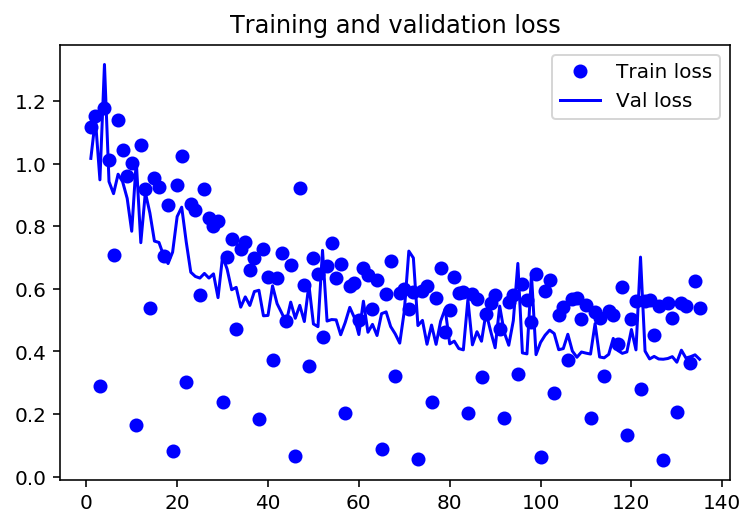

Training time is 13m 31s
K-Fold 0 end:
****************************************
K-Fold 1 start:
Epochs: 1/50... Trianing Loss:1.031... Val Loss:1.082... Val Accuracy:0.500
Epochs: 1/50... Trianing Loss:1.338... Val Loss:0.992... Val Accuracy:0.500
Epochs: 2/50... Trianing Loss:0.258... Val Loss:1.225... Val Accuracy:0.500
Epochs: 2/50... Trianing Loss:1.227... Val Loss:0.949... Val Accuracy:0.500
Epochs: 2/50... Trianing Loss:1.200... Val Loss:1.022... Val Accuracy:0.267
Epochs: 3/50... Trianing Loss:0.698... Val Loss:0.910... Val Accuracy:0.500
Epochs: 3/50... Trianing Loss:0.992... Val Loss:0.891... Val Accuracy:0.700
Epochs: 3/50... Trianing Loss:0.992... Val Loss:1.302... Val Accuracy:0.500
Epochs: 4/50... Trianing Loss:1.040... Val Loss:0.913... Val Accuracy:0.833
Epochs: 4/50... Trianing Loss:0.982... Val Loss:0.864... Val Accuracy:0.500
Epochs: 5/50... Trianing Loss:0.179... Val Loss:0.899... Val Accuracy:0.767
Epochs: 5/50... Trianing Loss:0.948... Val Loss:0.824... Val Accurac

Epochs: 40/50... Trianing Loss:0.640... Val Loss:0.452... Val Accuracy:0.767
Epochs: 40/50... Trianing Loss:0.608... Val Loss:0.421... Val Accuracy:0.800
Epochs: 41/50... Trianing Loss:0.523... Val Loss:0.448... Val Accuracy:0.767
Epochs: 41/50... Trianing Loss:0.552... Val Loss:0.417... Val Accuracy:0.833
Epochs: 42/50... Trianing Loss:0.149... Val Loss:0.431... Val Accuracy:0.800
Epochs: 42/50... Trianing Loss:0.578... Val Loss:0.429... Val Accuracy:0.800
Epochs: 42/50... Trianing Loss:0.522... Val Loss:0.430... Val Accuracy:0.800
Epochs: 43/50... Trianing Loss:0.409... Val Loss:0.736... Val Accuracy:0.767
Epochs: 43/50... Trianing Loss:0.766... Val Loss:0.400... Val Accuracy:0.833
Epochs: 43/50... Trianing Loss:0.479... Val Loss:0.466... Val Accuracy:0.767
Epochs: 44/50... Trianing Loss:0.540... Val Loss:0.409... Val Accuracy:0.833
Epochs: 44/50... Trianing Loss:0.522... Val Loss:0.396... Val Accuracy:0.833
Epochs: 45/50... Trianing Loss:0.122... Val Loss:0.398... Val Accuracy:0.833

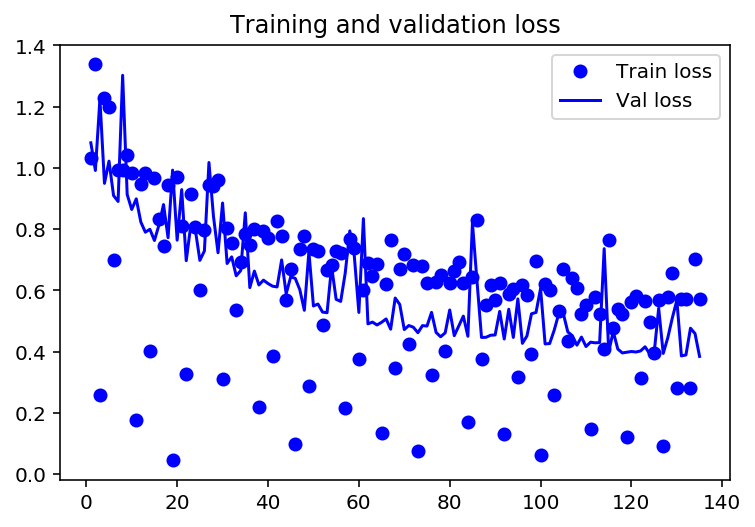

Training time is 13m 33s
K-Fold 1 end:
****************************************
K-Fold 2 start:
Epochs: 1/50... Trianing Loss:1.295... Val Loss:1.148... Val Accuracy:0.267
Epochs: 1/50... Trianing Loss:1.158... Val Loss:1.020... Val Accuracy:0.500
Epochs: 2/50... Trianing Loss:0.310... Val Loss:1.094... Val Accuracy:0.500
Epochs: 2/50... Trianing Loss:1.153... Val Loss:0.976... Val Accuracy:0.500
Epochs: 2/50... Trianing Loss:1.190... Val Loss:0.965... Val Accuracy:0.733
Epochs: 3/50... Trianing Loss:0.656... Val Loss:1.112... Val Accuracy:0.500
Epochs: 3/50... Trianing Loss:1.054... Val Loss:0.946... Val Accuracy:0.733
Epochs: 3/50... Trianing Loss:1.067... Val Loss:0.907... Val Accuracy:0.500
Epochs: 4/50... Trianing Loss:0.981... Val Loss:0.989... Val Accuracy:0.500
Epochs: 4/50... Trianing Loss:1.007... Val Loss:0.874... Val Accuracy:0.500
Epochs: 5/50... Trianing Loss:0.207... Val Loss:0.888... Val Accuracy:0.500
Epochs: 5/50... Trianing Loss:1.003... Val Loss:0.892... Val Accurac

Epochs: 40/50... Trianing Loss:0.547... Val Loss:0.587... Val Accuracy:0.733
Epochs: 40/50... Trianing Loss:0.551... Val Loss:0.427... Val Accuracy:0.767
Early stopping!
Epochs: 41/50... Trianing Loss:0.609... Val Loss:0.439... Val Accuracy:0.767
Epochs: 41/50... Trianing Loss:0.462... Val Loss:0.424... Val Accuracy:0.733
Epochs: 42/50... Trianing Loss:0.156... Val Loss:0.402... Val Accuracy:0.867
Epochs: 42/50... Trianing Loss:0.538... Val Loss:0.429... Val Accuracy:0.733
Epochs: 42/50... Trianing Loss:0.543... Val Loss:0.523... Val Accuracy:0.767
Epochs: 43/50... Trianing Loss:0.266... Val Loss:0.438... Val Accuracy:0.767
Epochs: 43/50... Trianing Loss:0.600... Val Loss:0.426... Val Accuracy:0.733
Epochs: 43/50... Trianing Loss:0.531... Val Loss:0.484... Val Accuracy:0.767
Epochs: 44/50... Trianing Loss:0.503... Val Loss:0.395... Val Accuracy:0.900
Epochs: 44/50... Trianing Loss:0.474... Val Loss:0.498... Val Accuracy:0.767
Epochs: 45/50... Trianing Loss:0.118... Val Loss:0.622... Va

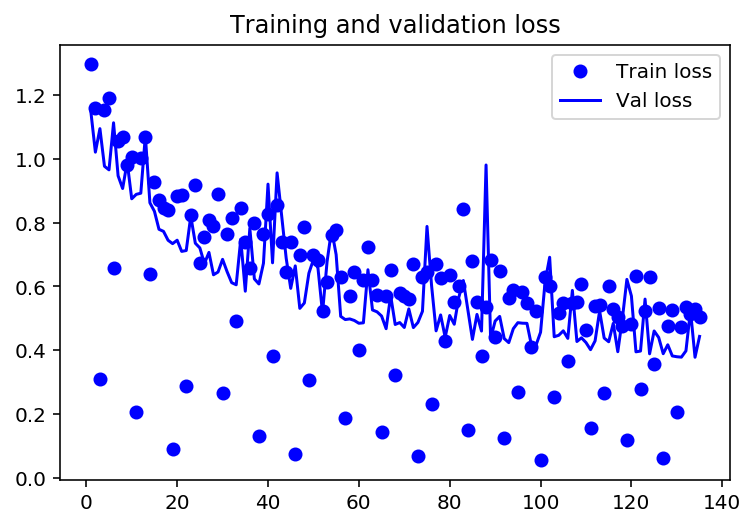

Training time is 13m 33s
K-Fold 2 end:
****************************************
K-Fold 3 start:
Epochs: 1/50... Trianing Loss:1.221... Val Loss:1.030... Val Accuracy:0.500
Epochs: 1/50... Trianing Loss:1.105... Val Loss:1.012... Val Accuracy:0.500
Epochs: 2/50... Trianing Loss:0.324... Val Loss:1.040... Val Accuracy:0.500
Epochs: 2/50... Trianing Loss:1.135... Val Loss:1.032... Val Accuracy:0.500
Epochs: 2/50... Trianing Loss:1.046... Val Loss:0.973... Val Accuracy:0.733
Epochs: 3/50... Trianing Loss:0.728... Val Loss:0.984... Val Accuracy:0.667
Epochs: 3/50... Trianing Loss:1.026... Val Loss:0.932... Val Accuracy:0.733
Epochs: 3/50... Trianing Loss:1.065... Val Loss:1.201... Val Accuracy:0.267
Epochs: 4/50... Trianing Loss:0.928... Val Loss:1.115... Val Accuracy:0.267
Epochs: 4/50... Trianing Loss:1.093... Val Loss:1.009... Val Accuracy:0.733
Epochs: 5/50... Trianing Loss:0.176... Val Loss:0.910... Val Accuracy:0.533
Epochs: 5/50... Trianing Loss:0.952... Val Loss:0.823... Val Accurac

Epochs: 40/50... Trianing Loss:0.502... Val Loss:0.462... Val Accuracy:0.767
Epochs: 40/50... Trianing Loss:0.553... Val Loss:0.507... Val Accuracy:0.767
Epochs: 41/50... Trianing Loss:0.651... Val Loss:0.490... Val Accuracy:0.733
Epochs: 41/50... Trianing Loss:0.488... Val Loss:0.458... Val Accuracy:0.767
Epochs: 42/50... Trianing Loss:0.174... Val Loss:0.519... Val Accuracy:0.767
Early stopping!
Epochs: 42/50... Trianing Loss:0.546... Val Loss:0.527... Val Accuracy:0.733
Epochs: 42/50... Trianing Loss:0.633... Val Loss:0.462... Val Accuracy:0.767
Epochs: 43/50... Trianing Loss:0.345... Val Loss:0.451... Val Accuracy:0.767
Epochs: 43/50... Trianing Loss:0.538... Val Loss:0.432... Val Accuracy:0.733
Epochs: 43/50... Trianing Loss:0.516... Val Loss:0.438... Val Accuracy:0.767
Epochs: 44/50... Trianing Loss:0.449... Val Loss:0.538... Val Accuracy:0.767
Epochs: 44/50... Trianing Loss:0.580... Val Loss:0.444... Val Accuracy:0.767
Epochs: 45/50... Trianing Loss:0.104... Val Loss:0.448... Va

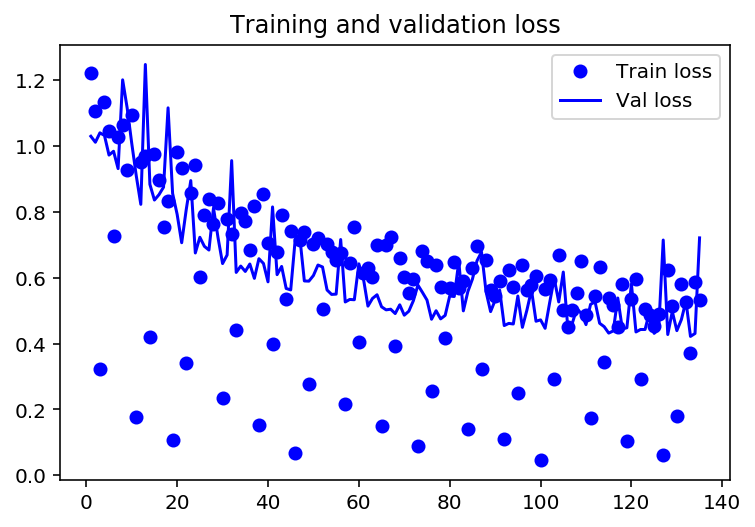

Training time is 13m 31s
K-Fold 3 end:
****************************************
K-Fold 4 start:
Epochs: 1/50... Trianing Loss:1.099... Val Loss:1.079... Val Accuracy:0.500
Epochs: 1/50... Trianing Loss:1.275... Val Loss:1.324... Val Accuracy:0.733
Epochs: 2/50... Trianing Loss:0.306... Val Loss:0.971... Val Accuracy:0.500
Epochs: 2/50... Trianing Loss:1.077... Val Loss:1.159... Val Accuracy:0.233
Epochs: 2/50... Trianing Loss:1.045... Val Loss:1.221... Val Accuracy:0.500
Epochs: 3/50... Trianing Loss:0.618... Val Loss:0.912... Val Accuracy:0.500
Epochs: 3/50... Trianing Loss:0.975... Val Loss:0.904... Val Accuracy:0.733
Epochs: 3/50... Trianing Loss:1.083... Val Loss:0.872... Val Accuracy:0.533
Epochs: 4/50... Trianing Loss:0.999... Val Loss:1.020... Val Accuracy:0.500
Epochs: 4/50... Trianing Loss:0.987... Val Loss:0.945... Val Accuracy:0.667
Epochs: 5/50... Trianing Loss:0.197... Val Loss:0.827... Val Accuracy:0.700
Epochs: 5/50... Trianing Loss:0.940... Val Loss:0.789... Val Accurac

Epochs: 40/50... Trianing Loss:0.572... Val Loss:0.866... Val Accuracy:0.733
Epochs: 40/50... Trianing Loss:0.529... Val Loss:0.533... Val Accuracy:0.767
Early stopping!
Epochs: 41/50... Trianing Loss:0.529... Val Loss:0.570... Val Accuracy:0.733
Epochs: 41/50... Trianing Loss:0.616... Val Loss:0.774... Val Accuracy:0.733
Epochs: 42/50... Trianing Loss:0.186... Val Loss:0.508... Val Accuracy:0.633
Epochs: 42/50... Trianing Loss:0.584... Val Loss:0.514... Val Accuracy:0.733
Epochs: 42/50... Trianing Loss:0.584... Val Loss:0.555... Val Accuracy:0.767
Epochs: 43/50... Trianing Loss:0.360... Val Loss:0.629... Val Accuracy:0.733
Epochs: 43/50... Trianing Loss:0.561... Val Loss:0.526... Val Accuracy:0.733
Epochs: 43/50... Trianing Loss:0.596... Val Loss:0.654... Val Accuracy:0.733
Epochs: 44/50... Trianing Loss:0.557... Val Loss:0.498... Val Accuracy:0.633
Epochs: 44/50... Trianing Loss:0.573... Val Loss:0.511... Val Accuracy:0.600
Epochs: 45/50... Trianing Loss:0.121... Val Loss:0.512... Va

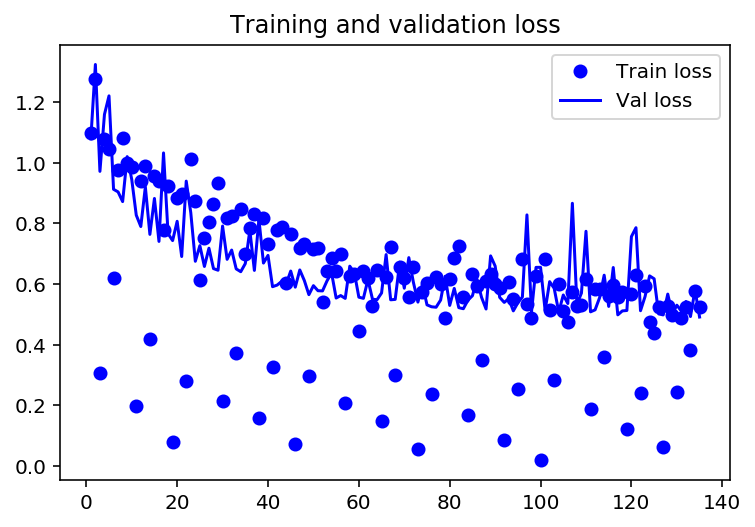

Training time is 13m 31s
K-Fold 4 end:
****************************************
K-Fold 5 start:
Epochs: 1/50... Trianing Loss:1.186... Val Loss:1.078... Val Accuracy:0.767
Epochs: 1/50... Trianing Loss:1.188... Val Loss:1.028... Val Accuracy:0.500
Epochs: 2/50... Trianing Loss:0.307... Val Loss:0.989... Val Accuracy:0.500
Epochs: 2/50... Trianing Loss:1.068... Val Loss:0.983... Val Accuracy:0.500
Epochs: 2/50... Trianing Loss:1.103... Val Loss:1.001... Val Accuracy:0.733
Epochs: 3/50... Trianing Loss:0.784... Val Loss:1.002... Val Accuracy:0.767
Epochs: 3/50... Trianing Loss:1.027... Val Loss:0.904... Val Accuracy:0.500
Epochs: 3/50... Trianing Loss:0.984... Val Loss:0.958... Val Accuracy:0.733
Epochs: 4/50... Trianing Loss:1.069... Val Loss:1.610... Val Accuracy:0.267
Epochs: 4/50... Trianing Loss:1.167... Val Loss:0.854... Val Accuracy:0.500
Epochs: 5/50... Trianing Loss:0.219... Val Loss:0.953... Val Accuracy:0.733
Epochs: 5/50... Trianing Loss:1.024... Val Loss:0.855... Val Accurac

Epochs: 40/50... Trianing Loss:0.517... Val Loss:0.446... Val Accuracy:0.800
Epochs: 40/50... Trianing Loss:0.701... Val Loss:0.445... Val Accuracy:0.767
Epochs: 41/50... Trianing Loss:0.621... Val Loss:0.520... Val Accuracy:0.733
Epochs: 41/50... Trianing Loss:0.626... Val Loss:0.689... Val Accuracy:0.733
Epochs: 42/50... Trianing Loss:0.190... Val Loss:0.436... Val Accuracy:0.767
Epochs: 42/50... Trianing Loss:0.594... Val Loss:0.431... Val Accuracy:0.767
Epochs: 42/50... Trianing Loss:0.612... Val Loss:0.476... Val Accuracy:0.767
Epochs: 43/50... Trianing Loss:0.339... Val Loss:0.478... Val Accuracy:0.767
Epochs: 43/50... Trianing Loss:0.643... Val Loss:0.527... Val Accuracy:0.733
Epochs: 43/50... Trianing Loss:0.557... Val Loss:0.424... Val Accuracy:0.767
Epochs: 44/50... Trianing Loss:0.451... Val Loss:0.527... Val Accuracy:0.767
Epochs: 44/50... Trianing Loss:0.543... Val Loss:0.437... Val Accuracy:0.800
Epochs: 45/50... Trianing Loss:0.102... Val Loss:0.427... Val Accuracy:0.800

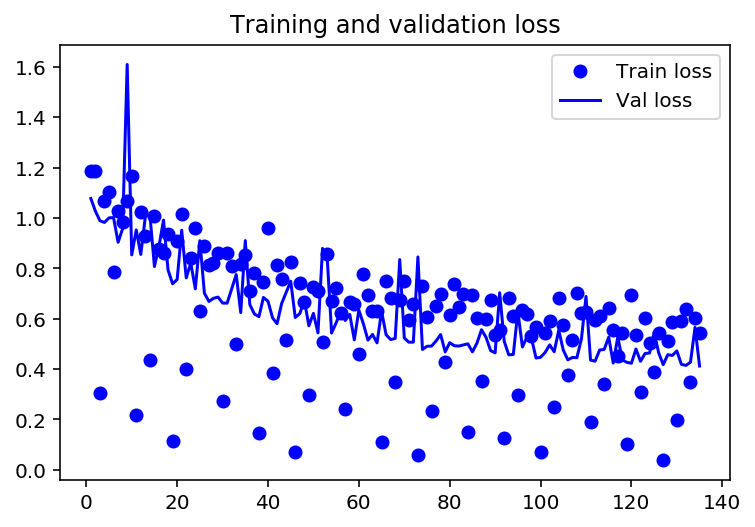

Training time is 13m 33s
K-Fold 5 end:
****************************************
K-Fold 6 start:
Epochs: 1/50... Trianing Loss:1.103... Val Loss:1.075... Val Accuracy:0.500
Epochs: 1/50... Trianing Loss:1.060... Val Loss:1.377... Val Accuracy:0.500
Epochs: 2/50... Trianing Loss:0.377... Val Loss:1.110... Val Accuracy:0.233
Epochs: 2/50... Trianing Loss:0.996... Val Loss:1.069... Val Accuracy:0.500
Epochs: 2/50... Trianing Loss:1.077... Val Loss:1.044... Val Accuracy:0.233
Epochs: 3/50... Trianing Loss:0.567... Val Loss:1.203... Val Accuracy:0.500
Epochs: 3/50... Trianing Loss:1.088... Val Loss:0.988... Val Accuracy:0.500
Epochs: 3/50... Trianing Loss:1.104... Val Loss:0.952... Val Accuracy:0.667
Epochs: 4/50... Trianing Loss:0.902... Val Loss:0.929... Val Accuracy:0.500
Epochs: 4/50... Trianing Loss:1.015... Val Loss:1.128... Val Accuracy:0.500
Epochs: 5/50... Trianing Loss:0.193... Val Loss:1.069... Val Accuracy:0.267
Epochs: 5/50... Trianing Loss:0.954... Val Loss:0.872... Val Accurac

Epochs: 40/50... Trianing Loss:0.557... Val Loss:0.455... Val Accuracy:0.733
Epochs: 40/50... Trianing Loss:0.516... Val Loss:0.494... Val Accuracy:0.767
Epochs: 41/50... Trianing Loss:0.621... Val Loss:0.468... Val Accuracy:0.767
Epochs: 41/50... Trianing Loss:0.559... Val Loss:0.449... Val Accuracy:0.767
Epochs: 42/50... Trianing Loss:0.136... Val Loss:0.430... Val Accuracy:0.833
Epochs: 42/50... Trianing Loss:0.566... Val Loss:0.483... Val Accuracy:0.767
Epochs: 42/50... Trianing Loss:0.532... Val Loss:0.435... Val Accuracy:0.767
Epochs: 43/50... Trianing Loss:0.358... Val Loss:0.499... Val Accuracy:0.767
Epochs: 43/50... Trianing Loss:0.521... Val Loss:0.443... Val Accuracy:0.767
Epochs: 43/50... Trianing Loss:0.545... Val Loss:0.461... Val Accuracy:0.733
Epochs: 44/50... Trianing Loss:0.552... Val Loss:0.435... Val Accuracy:0.833
Epochs: 44/50... Trianing Loss:0.555... Val Loss:0.495... Val Accuracy:0.767
Epochs: 45/50... Trianing Loss:0.099... Val Loss:0.458... Val Accuracy:0.767

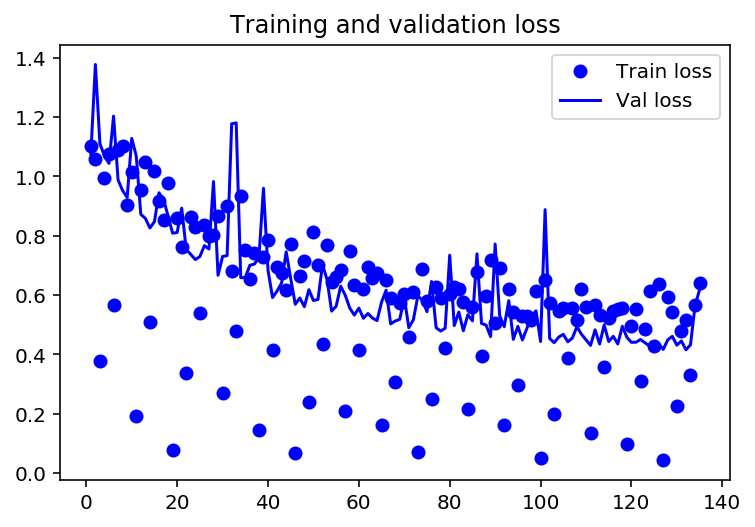

Training time is 13m 36s
K-Fold 6 end:
****************************************
K-Fold 7 start:
Epochs: 1/50... Trianing Loss:1.003... Val Loss:1.206... Val Accuracy:0.500
Epochs: 1/50... Trianing Loss:1.220... Val Loss:1.225... Val Accuracy:0.233
Epochs: 2/50... Trianing Loss:0.277... Val Loss:1.283... Val Accuracy:0.500
Epochs: 2/50... Trianing Loss:1.114... Val Loss:1.377... Val Accuracy:0.500
Epochs: 2/50... Trianing Loss:1.163... Val Loss:0.982... Val Accuracy:0.767
Epochs: 3/50... Trianing Loss:0.702... Val Loss:0.909... Val Accuracy:0.667
Epochs: 3/50... Trianing Loss:0.932... Val Loss:1.165... Val Accuracy:0.500
Epochs: 3/50... Trianing Loss:1.116... Val Loss:0.928... Val Accuracy:0.733
Epochs: 4/50... Trianing Loss:0.849... Val Loss:1.565... Val Accuracy:0.500
Epochs: 4/50... Trianing Loss:1.138... Val Loss:0.827... Val Accuracy:0.500
Epochs: 5/50... Trianing Loss:0.206... Val Loss:0.946... Val Accuracy:0.700
Epochs: 5/50... Trianing Loss:0.906... Val Loss:0.841... Val Accurac

Epochs: 40/50... Trianing Loss:0.650... Val Loss:0.470... Val Accuracy:0.767
Early stopping!
Epochs: 40/50... Trianing Loss:0.628... Val Loss:0.450... Val Accuracy:0.767
Epochs: 41/50... Trianing Loss:0.598... Val Loss:0.482... Val Accuracy:0.733
Epochs: 41/50... Trianing Loss:0.542... Val Loss:0.522... Val Accuracy:0.767
Epochs: 42/50... Trianing Loss:0.166... Val Loss:0.441... Val Accuracy:0.767
Epochs: 42/50... Trianing Loss:0.550... Val Loss:0.497... Val Accuracy:0.767
Epochs: 42/50... Trianing Loss:0.532... Val Loss:0.429... Val Accuracy:0.767
Epochs: 43/50... Trianing Loss:0.375... Val Loss:0.434... Val Accuracy:0.767
Epochs: 43/50... Trianing Loss:0.514... Val Loss:0.415... Val Accuracy:0.800
Epochs: 43/50... Trianing Loss:0.525... Val Loss:0.504... Val Accuracy:0.767
Epochs: 44/50... Trianing Loss:0.506... Val Loss:0.428... Val Accuracy:0.867
Epochs: 44/50... Trianing Loss:0.544... Val Loss:0.479... Val Accuracy:0.767
Epochs: 45/50... Trianing Loss:0.105... Val Loss:0.419... Va

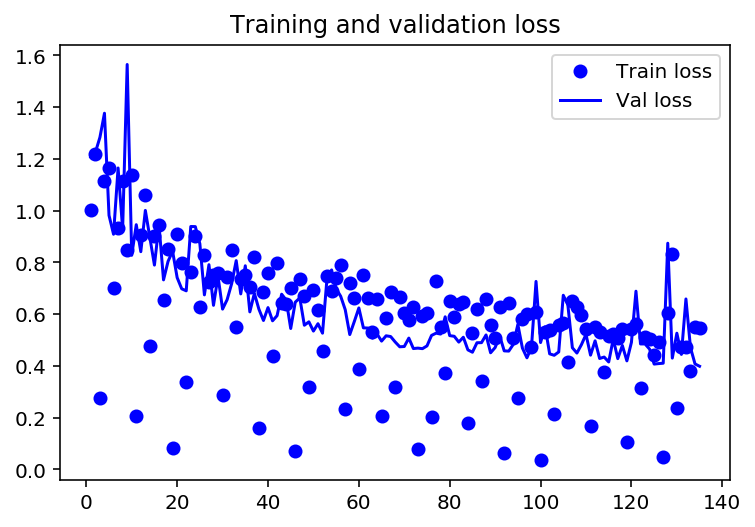

Training time is 13m 33s
K-Fold 7 end:
****************************************
K-Fold 8 start:
Epochs: 1/50... Trianing Loss:1.195... Val Loss:1.115... Val Accuracy:0.233
Epochs: 1/50... Trianing Loss:1.132... Val Loss:1.045... Val Accuracy:0.267
Epochs: 2/50... Trianing Loss:0.344... Val Loss:0.981... Val Accuracy:0.567
Epochs: 2/50... Trianing Loss:1.014... Val Loss:1.462... Val Accuracy:0.267
Epochs: 2/50... Trianing Loss:1.167... Val Loss:1.096... Val Accuracy:0.500
Epochs: 3/50... Trianing Loss:0.615... Val Loss:1.011... Val Accuracy:0.267
Epochs: 3/50... Trianing Loss:1.014... Val Loss:0.955... Val Accuracy:0.500
Epochs: 3/50... Trianing Loss:1.197... Val Loss:0.944... Val Accuracy:0.767
Epochs: 4/50... Trianing Loss:0.873... Val Loss:0.815... Val Accuracy:0.600
Epochs: 4/50... Trianing Loss:1.028... Val Loss:0.925... Val Accuracy:0.500
Epochs: 5/50... Trianing Loss:0.179... Val Loss:1.222... Val Accuracy:0.267
Epochs: 5/50... Trianing Loss:1.090... Val Loss:0.853... Val Accurac

Epochs: 40/50... Trianing Loss:0.569... Val Loss:0.480... Val Accuracy:0.733
Early stopping!
Epochs: 40/50... Trianing Loss:0.622... Val Loss:0.394... Val Accuracy:0.800
Epochs: 41/50... Trianing Loss:0.608... Val Loss:0.388... Val Accuracy:0.800
Epochs: 41/50... Trianing Loss:0.490... Val Loss:0.390... Val Accuracy:0.800
Epochs: 42/50... Trianing Loss:0.097... Val Loss:0.424... Val Accuracy:0.767
Epochs: 42/50... Trianing Loss:0.630... Val Loss:0.422... Val Accuracy:0.767
Epochs: 42/50... Trianing Loss:0.524... Val Loss:0.465... Val Accuracy:0.733
Epochs: 43/50... Trianing Loss:0.263... Val Loss:0.402... Val Accuracy:0.833
Epochs: 43/50... Trianing Loss:0.531... Val Loss:0.409... Val Accuracy:0.800
Epochs: 43/50... Trianing Loss:0.509... Val Loss:0.426... Val Accuracy:0.767
Epochs: 44/50... Trianing Loss:0.398... Val Loss:0.544... Val Accuracy:0.767
Epochs: 44/50... Trianing Loss:0.518... Val Loss:0.395... Val Accuracy:0.800
Epochs: 45/50... Trianing Loss:0.118... Val Loss:0.394... Va

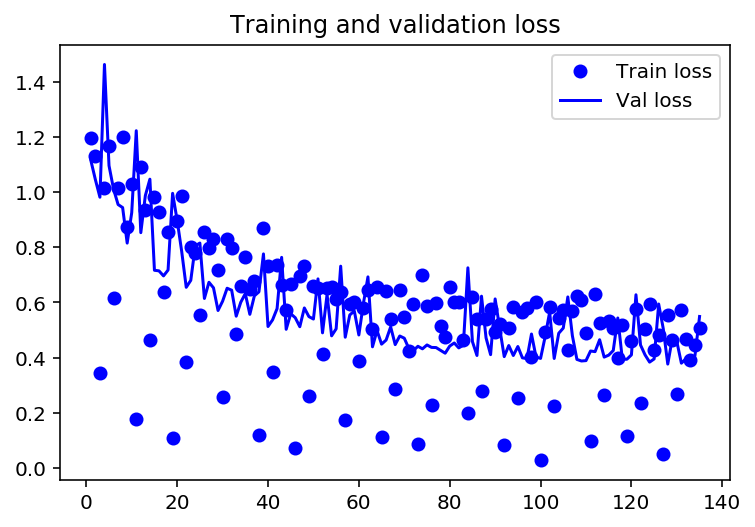

Training time is 13m 33s
K-Fold 8 end:
****************************************
K-Fold 9 start:
Epochs: 1/50... Trianing Loss:1.174... Val Loss:1.006... Val Accuracy:0.500
Epochs: 1/50... Trianing Loss:1.110... Val Loss:1.101... Val Accuracy:0.500
Epochs: 2/50... Trianing Loss:0.365... Val Loss:1.137... Val Accuracy:0.200
Epochs: 2/50... Trianing Loss:1.191... Val Loss:1.327... Val Accuracy:0.500
Epochs: 2/50... Trianing Loss:1.146... Val Loss:0.997... Val Accuracy:0.300
Epochs: 3/50... Trianing Loss:0.671... Val Loss:1.077... Val Accuracy:0.500
Epochs: 3/50... Trianing Loss:1.068... Val Loss:1.041... Val Accuracy:0.200
Epochs: 3/50... Trianing Loss:0.934... Val Loss:0.883... Val Accuracy:0.500
Epochs: 4/50... Trianing Loss:0.931... Val Loss:0.963... Val Accuracy:0.500
Epochs: 4/50... Trianing Loss:0.977... Val Loss:0.817... Val Accuracy:0.800
Epochs: 5/50... Trianing Loss:0.201... Val Loss:0.821... Val Accuracy:0.700
Epochs: 5/50... Trianing Loss:0.869... Val Loss:1.060... Val Accurac

Epochs: 40/50... Trianing Loss:0.524... Val Loss:0.545... Val Accuracy:0.700
Epochs: 40/50... Trianing Loss:0.667... Val Loss:0.475... Val Accuracy:0.700
Epochs: 41/50... Trianing Loss:0.637... Val Loss:0.403... Val Accuracy:0.733
Epochs: 41/50... Trianing Loss:0.517... Val Loss:0.412... Val Accuracy:0.800
Epochs: 42/50... Trianing Loss:0.182... Val Loss:0.385... Val Accuracy:0.800
Epochs: 42/50... Trianing Loss:0.572... Val Loss:0.384... Val Accuracy:0.900
Epochs: 42/50... Trianing Loss:0.520... Val Loss:0.493... Val Accuracy:0.700
Epochs: 43/50... Trianing Loss:0.319... Val Loss:0.377... Val Accuracy:0.900
Epochs: 43/50... Trianing Loss:0.583... Val Loss:0.380... Val Accuracy:0.800
Epochs: 43/50... Trianing Loss:0.607... Val Loss:0.674... Val Accuracy:0.700
Epochs: 44/50... Trianing Loss:0.466... Val Loss:0.374... Val Accuracy:0.833
Epochs: 44/50... Trianing Loss:0.463... Val Loss:0.384... Val Accuracy:0.867
Epochs: 45/50... Trianing Loss:0.120... Val Loss:0.385... Val Accuracy:0.800

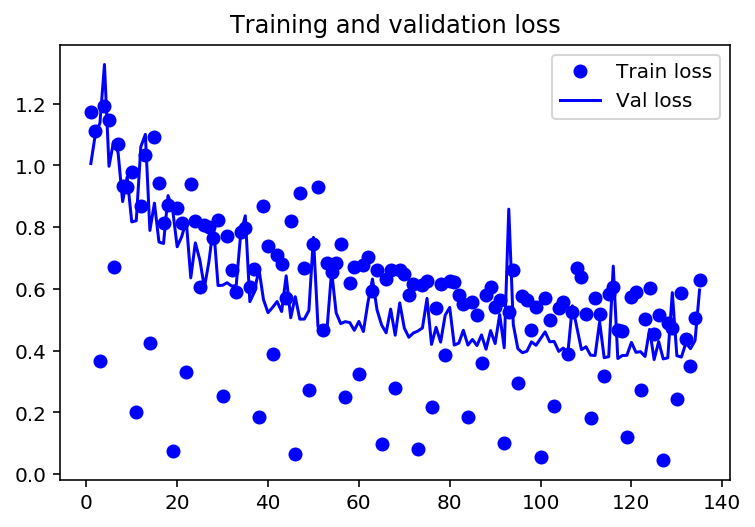

Training time is 13m 36s
K-Fold 9 end:
****************************************


In [4]:
for ii,(train_index,val_index) in enumerate(index):
    X_train = help.features[train_index]
    X_val = help.features[val_index]
    y_train = help.labels['label'].values[train_index]
    y_val = help.labels['label'].values[val_index]
    
    train_datasets = MyDataset(datas=X_train,labels=y_train,shape=3,input_D=help.input_D,input_H=help.input_H,input_W=help.input_W,phase='train')
    val_datasets = MyDataset(datas=X_val,labels=y_val,shape=3,input_D=help.input_D,input_H=help.input_H,input_W=help.input_W,phase='train')
    
    train_loader = torch.utils.data.DataLoader(dataset=train_datasets, batch_size=2, shuffle=True)
    val_loader = torch.utils.data.DataLoader(dataset=val_datasets, batch_size=1, shuffle=False)
    '''
    medicanet_resnet3d_10 = resnet.resnet10(sample_input_W=help.input_W,
                                        sample_input_H=help.input_H,
                                        sample_input_D=help.input_D,
                                        num_seg_classes=help.num_seg_classes)
    model_dict = medicanet_resnet3d_10.state_dict()
    ####去除不属于model_dict的键值
    pretrained_dict={ k : v for k, v in checkpoint.get('state_dict').items() if k in model_dict.keys()}
    ###更新现有的model_dict的值
    model_dict.update(pretrained_dict)
    medicanet_resnet3d_10.load_state_dict(model_dict)
    
    for param in medicanet_resnet3d_10.parameters():
        param.requires_grad = False
    for layer in [medicanet_resnet3d_10.avgpool,medicanet_resnet3d_10.fc]:
        for name, value in layer.named_parameters():
            value.requires_grad = True
    '''
    medicanet_resnet3d_10,parameters = generate_model(sample_input_W=help.input_W,
                                                   sample_input_H=help.input_H,
                                                   sample_input_D=help.input_D,
                                                   num_seg_classes=help.num_seg_classes,
                                                   phase='train',
                                                   pretrain_path=help.checkpoint_pretrain_resnet_10_23dataset)
    params = [
            { 'params': parameters['base_parameters'], 'lr': sets.learning_rate }, 
            { 'params': parameters['new_parameters'], 'lr': sets.learning_rate*100 }
            ]
    optimizer = optim.Adam(params, weight_decay=1e-3)
    scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.99)
    
    epochs = 50
    medicanet_3d_resnet10_checkpoint_path = 'medicanet_3d_resnet10_checkpoint_{}.pth'.format(ii)
    #params = [{'params':medicanet_resnet3d_10.avgpool.parameters()},{'params':medicanet_resnet3d_10.fc.parameters()}]
    #optimizer = optim.SGD(params,momentum=0.9, lr=0.001, weight_decay=1e-3)
    #scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.99)
    print('K-Fold {} start:'.format(ii))
    help.train_data(medicanet_resnet3d_10,train_loader,val_loader,epochs,optimizer,scheduler,help.criterion,medicanet_3d_resnet10_checkpoint_path,help.device)
    print('K-Fold {} end:'.format(ii))
    print('*'*40)

In [5]:
test_datasets = help.MyDataset(images=help.temp_data,shape=3,input_D=help.input_D,input_H=help.input_H,input_W=help.input_W,phase='test')
test_loader = DataLoader(dataset=test_datasets)

In [7]:
for i in range(10):
    medicanet_3d_resnet10_checkpoint_path = 'medicanet_3d_resnet10_checkpoint_{}.pth'.format(i)
    loadmodel = help.load_checkpoint(medicanet_3d_resnet10_checkpoint_path,'medicanet_resnet3d_10','test',help.device)
    print('Predict result with Model {}'.format(i))
    help.all_predict(test_loader,loadmodel,help.device,'submit_medicanet_3d_resnet10_{}.csv'.format(i))
    print('*'*40)

Predict result with Model 0
0 test data have been predicted
----------------------------------------
20 test data have been predicted
----------------------------------------
40 test data have been predicted
----------------------------------------
60 test data have been predicted
----------------------------------------
80 test data have been predicted
----------------------------------------
100 test data have been predicted
----------------------------------------
120 test data have been predicted
----------------------------------------
140 test data have been predicted
----------------------------------------
160 test data have been predicted
----------------------------------------
180 test data have been predicted
----------------------------------------
200 test data have been predicted
----------------------------------------
220 test data have been predicted
----------------------------------------
Test time is 0m 12s
****************************************
Predict result wi

100 test data have been predicted
----------------------------------------
120 test data have been predicted
----------------------------------------
140 test data have been predicted
----------------------------------------
160 test data have been predicted
----------------------------------------
180 test data have been predicted
----------------------------------------
200 test data have been predicted
----------------------------------------
220 test data have been predicted
----------------------------------------
Test time is 0m 12s
****************************************
Predict result with Model 9
0 test data have been predicted
----------------------------------------
20 test data have been predicted
----------------------------------------
40 test data have been predicted
----------------------------------------
60 test data have been predicted
----------------------------------------
80 test data have been predicted
----------------------------------------
100 test data hav

In [10]:

result_df = pd.DataFrame(columns=['testa_id','label'])
result_0 = pd.read_csv('submit_medicanet_3d_resnet10_0.csv')
result_1 = pd.read_csv('submit_medicanet_3d_resnet10_1.csv')
result_2 = pd.read_csv('submit_medicanet_3d_resnet10_2.csv')
result_3 = pd.read_csv('submit_medicanet_3d_resnet10_3.csv')
result_4 = pd.read_csv('submit_medicanet_3d_resnet10_4.csv')
result_5 = pd.read_csv('submit_medicanet_3d_resnet10_5.csv')
result_6 = pd.read_csv('submit_medicanet_3d_resnet10_6.csv')
result_7 = pd.read_csv('submit_medicanet_3d_resnet10_7.csv')
result_8 = pd.read_csv('submit_medicanet_3d_resnet10_8.csv')
result_9 = pd.read_csv('submit_medicanet_3d_resnet10_9.csv')

for i in range(result_0.shape[0]):
    label_item = []
    label_item.append(result_0.iloc[i,1])
    label_item.append(result_1.iloc[i,1])
    label_item.append(result_2.iloc[i,1])
    label_item.append(result_3.iloc[i,1])
    label_item.append(result_4.iloc[i,1])
    label_item.append(result_5.iloc[i,1])
    label_item.append(result_6.iloc[i,1])
    label_item.append(result_7.iloc[i,1])
    label_item.append(result_8.iloc[i,1])
    label_item.append(result_9.iloc[i,1])
    label = max(label_item, key=label_item.count)
    if i < 116:
        result_df.loc[result_df.shape[0]] = [('testa_{}'.format(i)),label]
    else:
        result_df.loc[result_df.shape[0]] = [('testb_{}'.format(i - 116)),label]
result_df.to_csv(help.result_medicanet_3d_resnet10_skfold,index=False)
